# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('06-x_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('06-x_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('06-y_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('06-y_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **NORMALIZACION DE CARACTERISTICAS**

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [4]:
x_train_std

array([[ 0.0703118 , -0.66880798,  0.40607192, ..., -1.18126693,
        -0.60868486,  0.22867699],
       [-0.85783443, -0.89335889,  0.59077473, ...,  0.13238371,
         0.68338356, -1.92285126],
       [-0.77462166, -0.71926769,  0.50725667, ...,  0.13381173,
         0.04052675, -0.99923403],
       ...,
       [-0.33221569, -0.53802181,  0.19789605, ..., -1.01489632,
        -1.23536556, -0.5275412 ],
       [-0.60033417, -0.31859421, -0.1955175 , ..., -1.80129709,
        -0.21289047, -0.2830091 ],
       [ 0.93470275,  0.61073517, -1.26307365, ...,  0.62483568,
         0.43870653,  0.93596486]])

# **MODELO DE MARCHINE LEARNING**

In [5]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13312     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [6]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
16/16 [==============================] - 1s 3ms/step - loss: 1.1903 - accuracy: 0.4356
Epoch 2/800
16/16 [==============================] - 0s 4ms/step - loss: 0.9785 - accuracy: 0.5542
Epoch 3/800
16/16 [==============================] - 0s 3ms/step - loss: 0.8590 - accuracy: 0.6196
Epoch 4/800
16/16 [==============================] - 0s 3ms/step - loss: 0.7627 - accuracy: 0.6748
Epoch 5/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.7076
Epoch 6/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.7648
Epoch 7/800
16/16 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7873
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.8262
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.8528
Epoch 10/800
16/16 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8466
Epoch 11/

array([0, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 3, 1, 3, 3, 0, 0, 2, 3, 0,
       0, 0, 1, 1, 2, 2, 3, 0, 0, 1, 1, 0, 3, 2, 2, 2, 1, 2, 1, 0, 0, 0,
       1, 2, 3, 2, 1, 2, 3, 0, 1, 2, 3, 3, 2, 3, 0, 0, 2, 3, 1, 0, 0, 1,
       1, 0, 0, 0, 3, 3, 1, 1, 1, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2,
       0, 0, 1, 3, 1, 2, 0, 3, 0, 3, 2, 1, 2])

# **EVALUACION**

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.57      0.49      0.52        35
           2       0.50      0.76      0.60        17
           3       0.80      0.62      0.70        32

    accuracy                           0.67       123
   macro avg       0.66      0.68      0.66       123
weighted avg       0.69      0.67      0.67       123



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.57      0.49      0.52        35
           2       0.50      0.76      0.60        17
           3       0.80      0.62      0.70        32

    accuracy                           0.67       123
   macro avg       0.66      0.68      0.66       123
weighted avg       0.69      0.67      0.67       123

Matriz de confusión, sin normalización
[[33  3  2  1]
 [ 9 17  7  2]
 [ 0  2 13  2]
 [ 0  8  4 20]]


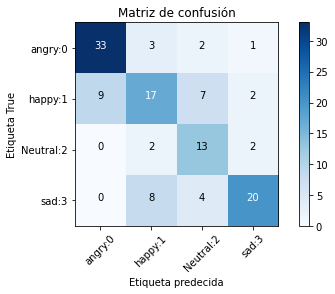

In [9]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')